In [1]:
from utils import calc_third_quartile, get_unique_act, get_compliant_cases, plot_case_occ 
import numpy as np
import os
import pickle
import pandas as pd
import random
from statistics import mean, median

In [2]:
pwd

'/home/avani/Desktop/IBM/src/jn scripts'

In [3]:
cd ..

/home/avani/Desktop/IBM/src


In [4]:
df2 = pd.read_pickle('dataset/preprocessed/helpdesk_design_mat.pkl')

In [6]:
# get process flow compliance cases only
df = get_compliant_cases(df2)   

In [9]:
caseId_lis = df["CaseID"].unique()
num_cases = len(caseId_lis)
num_cases

3157

In [10]:
import random
random.shuffle(caseId_lis)

In [11]:
train_cases_start = 0
train_cases_end = int(.65*num_cases)
val_cases_start = train_cases_end
val_cases_end = int(val_cases_start + .1*num_cases)
test_cases_start = val_cases_end 
test_cases_end = num_cases


In [12]:
cases_train = caseId_lis[train_cases_start:train_cases_end]
cases_val = caseId_lis[val_cases_start:val_cases_end]
cases_test = caseId_lis[test_cases_start:test_cases_end]

In [30]:
# df = pd.read_pickle('dataset/preprocessed/helpdesk.pkl')
dat_group = final_df.groupby("CaseID")

total_iter = len(dat_group.ngroup())
case_duration_dic = {}
for name, gr in dat_group:
    case_duration_dic[name] = gr['duration_time'].sum()
    

In [11]:
max(df['duration_time'])

46.7043287037037

In [12]:
case_duration_dic

{2: 2.0140509259259263,
 3: 5.296655092592593,
 4: 0.7336342592592593,
 6: 0.7783333333333333,
 8: 0.051550925925925924,
 9: 18.106516203703706,
 10: 36.997835648148154,
 11: 0.771550925925926,
 14: 0.0038078703703703703,
 17: 26.30613425925926,
 19: 2.095300925925926,
 21: 12.794375,
 22: 35.09466435185185,
 24: 42.20578703703704,
 25: 0.24256944444444445,
 26: 0.14715277777777777,
 27: 17.793414351851855,
 29: 0.0987037037037037,
 30: 19.96805555555556,
 32: 1.027361111111111,
 36: 5.892997685185185,
 38: 0.014710648148148148,
 40: 0.022881944444444444,
 41: 0.0005324074074074074,
 42: 0.05291666666666667,
 43: 0.08120370370370371,
 44: 0.00800925925925926,
 45: 41.85607638888889,
 47: 5.21962962962963,
 48: 1.0177546296296296,
 49: 7.0778125,
 51: 18.82324074074074,
 52: 0.8111342592592593,
 55: 25.72894675925926,
 57: 4.291458333333334,
 60: 6.717743055555555,
 61: 0.33341435185185186,
 66: 0.17991898148148147,
 67: 13.862534722222222,
 68: 0.8487847222222222,
 70: 34.9761921296296

reference for calulating quartile [here](http://web.mnstate.edu/peil/MDEV102/U4/S36/S363.html#:~:text=The%20third%20quartile%2C%20denoted%20by,25%25%20lie%20above%20Q3%20)

In [13]:
mean(case_duration_dic.values())

8.488259834113492

In [14]:
# quartile calculation 
case_durations = list(case_duration_dic.values())
third_quartile  = calc_third_quartile(case_durations)

In [15]:
third_quartile

13.894207175925928

In [16]:
cases_gs = []
cases_gv = []
for k,v in case_duration_dic.items():
    if v <= third_quartile:
        cases_gs.append(k)
    else:
        cases_gv.append(k)

In [17]:
len(cases_gs), len(cases_gv)

(2367, 790)

In [18]:
gs_data = df.loc[df['CaseID'].isin(cases_gs)]
gv_data = df.loc[df['CaseID'].isin(cases_gv)]

In [19]:
tot = len(cases_gs)+ len(cases_gv)
percent_gs_cases = len(cases_gs) / tot
print(percent_gs_cases)

0.7497624326892619


In [51]:
df.shape, len(cases_train), len(cases_val), len(cases_test)

((10908, 14), 2052, 315, 790)

In [18]:
data_train = df.loc[df['CaseID'].isin(cases_train)]
data_val = df.loc[df['CaseID'].isin(cases_val)]
data_test = df.loc[df['CaseID'].isin(cases_test)]

In [44]:
name = 'dataset/preprocessed/helpdesk_d2'
pickle.dump(data_train, open(name+"_train_RL.pkl", "wb"))
pickle.dump(data_val, open(name+"_val_RL.pkl", "wb"))
pickle.dump(data_test, open(name+"_test_RL.pkl", "wb"))

In [20]:
data_train

,0,1,2,3,4,5,6,7,8,9,duration_time,remaining_time,class,CaseID
17,0,1,0,0,0,0,0,0,0,0,0.000000,0.051551,1,8
18,0,0,0,0,0,0,0,0,1,0,0.038345,0.013206,8,8
19,0,0,0,0,0,0,1,0,0,0,0.013206,0.000000,6,8
20,0,0,0,1,0,0,0,0,0,0,0.000000,18.106516,3,9
21,0,1,0,0,0,0,0,0,0,0,0.000150,18.106366,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13705,0,0,0,0,0,0,0,0,1,0,0.145417,0.000139,8,4579
13706,0,0,0,0,0,0,1,0,0,0,0.000139,0.000000,6,4579
13707,0,0,0,0,0,0,0,0,1,0,0.000000,7.315243,8,4580
13708,0,0,0,0,0,0,0,0,0,1,7.247546,0.067697,9,4580


In [21]:
data_test

,0,1,2,3,4,5,6,7,8,9,duration_time,remaining_time,class,CaseID
6,0,1,0,0,0,0,0,0,0,0,0.000000,0.733634,1,4
7,0,0,0,0,0,0,0,0,1,0,0.728634,0.005000,8,4
8,0,0,0,0,0,0,1,0,0,0,0.005000,0.000000,6,4
14,0,1,0,0,0,0,0,0,0,0,0.000000,0.778333,1,6
15,0,0,0,0,0,0,0,0,1,0,0.031215,0.747118,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13676,0,0,0,0,0,0,0,0,1,0,22.169537,0.000104,8,4569
13677,0,0,0,0,0,0,1,0,0,0,0.000104,0.000000,6,4569
13696,0,1,0,0,0,0,0,0,0,0,0.000000,0.049306,1,4576
13697,0,0,0,0,0,0,0,0,1,0,0.000220,0.049086,8,4576


In [22]:
get_unique_act(data_train)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
get_unique_act(data_test)

[0, 1, 2, 3, 5, 6, 8, 9]

In [24]:
get_unique_act(data_val)

[0, 1, 2, 3, 6, 8, 9]

In [37]:
get_unique_act(df2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
get_unique_act(df)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
get_unique_act(gs_data)

[0, 1, 2, 3, 6, 7, 8, 9]

In [20]:
get_unique_act(gv_data)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

stats after filtering dfg compliant cases
activity   occurance
1             3449
2             23
3             96
4             4
5             2
6             3157
7             2
8             3503
9             672


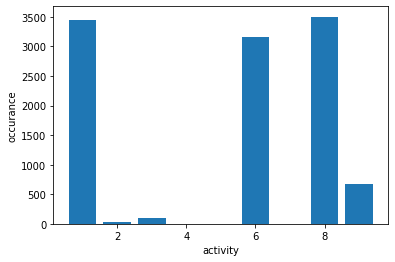

In [42]:
print("stats after filtering dfg compliant cases")
plot_case_occ(df)
  

stats initial
activity   occurance
1             4144
2             45
3             108
4             14
5             5
6             4150
7             4
8             4278
9             962


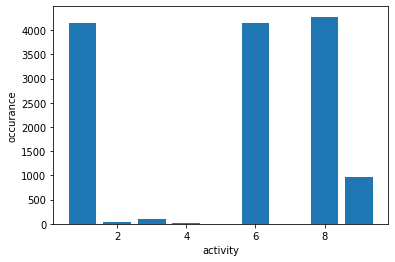

In [43]:
print("stats initial")
plot_case_occ(df2)